# Simulation of the stochastic SIR model

We initialize the simulation with certain number of Infected, and then add one more which is tracked. Until he or she becomes healed, we count the secondary cases from it. After he or she becomes healed the simulation stops. The simulations are repeated NoSimulations times and the average of secondary cases is reported.

In [15]:
import numpy as np

# Parameters
N = 100000 # Polupation size
gam = 1.0
bet = 5.0

Vreminja = []
NoSimulations = 1000
SecondaryCasesList = [] #  Кога е почетокот на заразата и колку се заразени

for j in range(NoSimulations):
    Healed = False
    Infected = 101
    Recovered = 0
    Susceptible = N - Recovered - Infected    
    NewCases = 0
    while not Healed:
        if np.random.random() < gam / (gam + bet * Susceptible / N): #  Recovering of some infected
            if np.random.random() <= 1.0 / Infected: # The tracked one is recovered
                Healed = True 
                SecondaryCasesList.append(NewCases)
            Infected -= 1
            Recovered += 1              
        else: # If not a recovery, new infection appears
            if np.random.random() <= 1.0 / Infected:  # Is new case from the tracked individual
                NewCases += 1
            Infected += 1
            Susceptible -= 1
    if j % (NoSimulations // 10) == 0: # Print 10 steps of the simulation to track whether it is OK
        print(j, sum(SecondaryCasesList) / len(SecondaryCasesList)) 
            
# Print final result
print(sum(SecondaryCasesList) / len(SecondaryCasesList))
print("   classical ", bet * (N - Infected) / (N * gam)) # Print classical result for comparison

0 5.0
100 4.306930693069307
200 3.970149253731343
300 3.953488372093023
400 3.9800498753117206
500 3.9241516966067866
600 4.039933444259567
700 3.948644793152639
800 3.9463171036204745
900 4.016648168701443
4.09
   classical  3.69025


# Theoretical values of the replacement number

Here we apply numerical solution of the ODE-based SIR model and then use it in the integral formula for the replacement number. The integration of the ODE starts with certain fraction of infected.

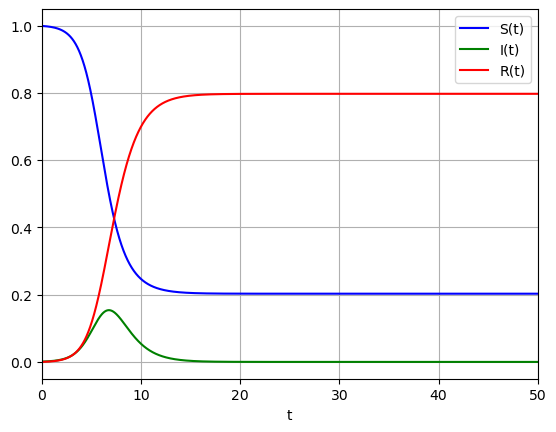

  For initial fraction of infected   0.001   the relacement number is  1.9784297400831277
[ 2.02845893e-01 -1.07773972e-11  7.97154107e-01]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define the SIR model - the RHS of the differential equations
def SIR(y, t, bet, gam):
    S, I, R = y
    dydt = [- bet * S * I, (bet * S - gam) * I, gam * I]
    return dydt


# caclutate
def RByIntegral(bet, gam, S, dT):
    NoPoints = len(S) # At how many points t we have the values S(t) (we don't need I(t) and R(t)
    RepNum = 0
    for i in range(NoPoints - 1):
        RepNum += 0.5 * dT * bet * (S[i + 1] * np.exp(- gam * dT * (i + 1)) + S[i] * np.exp(- gam * dT * i))
    return RepNum


I0 = 1.0e-3 # I(0)
R0 = 0.0  # R(0)
S0 = 1 - I0 - R0   #S(0)

gam = 1.0
bet = 2.0

y0 = [S0, I0, R0]
Duration = 100   # duration of the simulation. It will be noticed that the epidemics is over after time Duration
Steps = 1000   # delta t - how many points in unit of time

t = np.linspace(0, Duration, 1 + Steps * Duration)
SIR_Solution = odeint(SIR, y0, t, args=(bet, gam))

plt.plot(t, SIR_Solution[:, 0], 'b', label='S(t)')
plt.plot(t, SIR_Solution[:, 1], 'g', label='I(t)')
plt.plot(t, SIR_Solution[:, 2], 'r', label='R(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.xlim(0,50)  # plot half of the period and see that it is enough
plt.grid()
plt.show()

R0 = RByIntegral(bet, gam, SIR_Solution[:, 0], 1.0 / Steps)
print("  For initial fraction of infected  ", I0, "  the relacement number is ", R0)
# print final values od S, I, R (to verify that I -> 0, that is the epidemic is over
print(SIR_Solution[-1])  